# Data Analysis and Visualisations for Google Data Analytics Capstone Project (Cyclistic bike-share program)


## Discription

This Notebook contains the **Analyze** and **Share** phases of data analysis process for **Google Data Analytics Capstone Project** for a *fictional* bike-share company. The data, however is real and collected from a bike-sharing service based in Chicago (“DIVVY”).  
The Data Cleaning portion of this project is located [here](https://www.kaggle.com/liudmilalitonina/cyclistic-project-data-cleaning-phase).
Time period analysed - **October 2020 - September 2021**

### Quick introduction for the project:
Cyclistic is a bike-share program launched in 2016 that features more than 5,800 bicycles and 600 docking stations (as of 2021 close to 800). Cyclistic sets itself apart by offering different types of bikes such as reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make it possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno(Director of Marketing) believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

There is the need to design marketing strategies aimed at converting casual riders into annual members. 

### The main question I will be working on during the Analysis Phase: 
- How do annual members and casual riders use Cyclistic bikes differently?


## Here is a quick overview of this notebook:
- [Preparation: Importing the data, adding columns, reshaping the data](#section-one)
- [Step 1: Analysing the duration of the rides](#section-two)
- [Step 2: Analyising usage of the service](#section-three)
- [Step 3: Taking a closer look at the data from February and July](#section-four)
- [Step 4: Comparing bike preferences among members and casual riders](#section-five)
- [Step 5: Analysing and presenting visually the most popular bike stations](#section-six)
- [Step 6: Analysing and presenting visually the most popular routes taken by users](#section-seven)
- [Conclusion and possible suggestions for the marketing strategy](#section-eight)



<a id="section-one"></a>
# Preparation: Importing the data, adding columns, reshaping the data

In [1]:
# First I import the libraries that will be used in this notebook

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import folium
from folium.plugins import DualMap


In [2]:
# Importing the csv files from a dataset with precleaned data into our notebook

df_rides = pd.read_csv('../input/cyclistic-clean-data/clean_Cyclistic_bike_data_ids_only_102020_092021.csv')
df_start_stations = pd.read_csv('../input/cyclistic-clean-data/Cyclistic_start_stations.csv')
df_end_stations = pd.read_csv('../input/cyclistic-clean-data/Cyclistic_end_stations.csv')

Since I am planning on creating some maps to visualise the data, it makes sence for me to get rid of slightly varying start/end coordinates, that exist in the original dataset.  
Therefore I will merge a precleaned rides dataset with prepared start and end stations datasets.  
Let's take a look at our data.

In [3]:
df_start_stations

,start_station_name,start_station_id,start_lat,start_lng
0,2112 W Peterson Ave,569,41.991200,-87.683600
1,63rd St Beach,72,41.781000,-87.576100
2,900 W Harrison St,66,41.874754,-87.649807
3,Aberdeen St & Jackson Blvd,755,41.877726,-87.654787
4,Aberdeen St & Monroe St,334,41.880419,-87.655519
...,...,...,...,...
775,Woodlawn Ave & 55th St,590,41.795300,-87.596500
776,Woodlawn Ave & 75th St,983,41.759160,-87.595751
777,Woodlawn Ave & Lake Park Ave,602,41.814111,-87.597016
778,Yates Blvd & 75th St,910,41.758768,-87.566440


In [4]:
# The 'rides' dataset does not contain any information about the station, but it has station ids. With those ids we can merge
# the rides with the stations
df_rides

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,member_casual
0,D7AF692CFFAF7D2C,docked_bike,2020-10-01 00:00:06,2020-10-01 00:19:08,236,752,casual
1,7B6F00FC8CFBD375,docked_bike,2020-10-01 00:00:30,2020-10-01 00:37:56,455,455,casual
2,783FEDE9D82022A5,electric_bike,2020-10-01 00:00:43,2020-10-01 00:08:32,53,392,member
3,97FE368795B20D9E,electric_bike,2020-10-01 00:00:46,2020-10-01 00:08:11,53,392,member
4,5403CD9766829B3D,electric_bike,2020-10-01 00:00:48,2020-10-01 00:12:35,400,984,casual
...,...,...,...,...,...,...,...
4349538,B70FFAEA8E5A34EB,classic_bike,2021-09-30 23:58:37,2021-10-01 00:15:41,78,742,member
4349539,4D248C3CF607D3CB,classic_bike,2021-09-30 23:59:07,2021-10-01 00:04:44,841,852,member
4349540,D10FFD88830F50EA,electric_bike,2021-09-30 23:59:16,2021-10-01 00:13:16,439,347,casual
4349541,8D3EAC038013987F,docked_bike,2021-09-30 23:59:25,2021-10-01 00:11:41,291,124,casual


In [5]:
# Merging stations tables to the rides dataset and renaming it "df"
# Order of the columns doesn't really matter so we can leave it as it is 

df = df_rides.merge(df_start_stations, how = 'inner', on = 'start_station_id')
df = df.merge(df_end_stations, how = 'inner', on = 'end_station_id')
df

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,member_casual,start_station_name,start_lat,start_lng,end_station_name,end_lat,end_lng
0,D7AF692CFFAF7D2C,docked_bike,2020-10-01 00:00:06,2020-10-01 00:19:08,236,752,casual,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496
1,69EE5097520BCBA3,docked_bike,2020-10-11 11:47:04,2020-10-11 12:01:30,236,752,member,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496
2,9C402A0BEAD52E63,docked_bike,2020-10-11 11:47:07,2020-10-11 12:01:27,236,752,member,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496
3,AFB9E917B7516F6A,classic_bike,2021-01-19 16:19:59,2021-01-19 16:38:23,236,752,member,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496
4,B61C622B3A930228,classic_bike,2021-03-29 14:08:43,2021-03-29 14:25:39,236,752,member,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4349538,096839D15AC678C5,electric_bike,2021-09-27 15:53:57,2021-09-27 15:55:43,210,210,casual,St Louis Ave & Norman Bobbins Ave,41.790000,-87.710000,St Louis Ave & Norman Bobbins Ave,41.790,-87.7100
4349539,19F924DB5B404045,electric_bike,2021-09-27 14:49:31,2021-09-27 17:16:12,474,474,casual,Richmond St & 59th St,41.790000,-87.700000,Richmond St & 59th St,41.790,-87.7000
4349540,978D680AC31D78A5,electric_bike,2021-09-28 14:15:01,2021-09-28 17:24:42,474,474,casual,Richmond St & 59th St,41.790000,-87.700000,Richmond St & 59th St,41.790,-87.7000
4349541,2CA3D63472C447C9,electric_bike,2021-09-29 15:39:49,2021-09-29 15:46:14,474,474,casual,Richmond St & 59th St,41.790000,-87.700000,Richmond St & 59th St,41.790,-87.7000


In [6]:
# We can see that the started_at and ended_at columns have wrong datatypes, so we need to change that
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4349543 entries, 0 to 4349542
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_id    int64  
 5   end_station_id      int64  
 6   member_casual       object 
 7   start_station_name  object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_station_name    object 
 11  end_lat             float64
 12  end_lng             float64
dtypes: float64(4), int64(2), object(7)
memory usage: 464.6+ MB


In [7]:
# The data was precleaned, but lets still check if there are any null values
df.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_id      0
end_station_id        0
member_casual         0
start_station_name    0
start_lat             0
start_lng             0
end_station_name      0
end_lat               0
end_lng               0
dtype: int64

In [8]:
# Fixing the datatype issue with the dates and creating a new column 'trip_duration'

df[['started_at', 'ended_at']] = df[['started_at', 'ended_at']].astype('datetime64')

df['trip_duration'] = (df['ended_at'] - df['started_at']).astype('timedelta64[m]')

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,member_casual,start_station_name,start_lat,start_lng,end_station_name,end_lat,end_lng,trip_duration
0,D7AF692CFFAF7D2C,docked_bike,2020-10-01 00:00:06,2020-10-01 00:19:08,236,752,casual,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496,19.0
1,69EE5097520BCBA3,docked_bike,2020-10-11 11:47:04,2020-10-11 12:01:30,236,752,member,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496,14.0
2,9C402A0BEAD52E63,docked_bike,2020-10-11 11:47:07,2020-10-11 12:01:27,236,752,member,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496,14.0
3,AFB9E917B7516F6A,classic_bike,2021-01-19 16:19:59,2021-01-19 16:38:23,236,752,member,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496,18.0
4,B61C622B3A930228,classic_bike,2021-03-29 14:08:43,2021-03-29 14:25:39,236,752,member,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496,16.0


In [9]:
# Creating additional columns for start_day, start_month and start_hour

df['start_month'] = df['started_at'].dt.month_name()

df['start_day'] = df['started_at'].dt.day_name()

df['start_hour'] = df['started_at'].dt.hour

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,member_casual,start_station_name,start_lat,start_lng,end_station_name,end_lat,end_lng,trip_duration,start_month,start_day,start_hour
0,D7AF692CFFAF7D2C,docked_bike,2020-10-01 00:00:06,2020-10-01 00:19:08,236,752,casual,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496,19.0,October,Thursday,0
1,69EE5097520BCBA3,docked_bike,2020-10-11 11:47:04,2020-10-11 12:01:30,236,752,member,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496,14.0,October,Sunday,11
2,9C402A0BEAD52E63,docked_bike,2020-10-11 11:47:07,2020-10-11 12:01:27,236,752,member,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496,14.0,October,Sunday,11
3,AFB9E917B7516F6A,classic_bike,2021-01-19 16:19:59,2021-01-19 16:38:23,236,752,member,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496,18.0,January,Tuesday,16
4,B61C622B3A930228,classic_bike,2021-03-29 14:08:43,2021-03-29 14:25:39,236,752,member,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496,16.0,March,Monday,14


In [10]:
# Deleting the rides that are less than 1 minute because the users likely changed their mind about using the service.

df = df[df['trip_duration'] >= 1]

In [11]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,member_casual,start_station_name,start_lat,start_lng,end_station_name,end_lat,end_lng,trip_duration,start_month,start_day,start_hour
0,D7AF692CFFAF7D2C,docked_bike,2020-10-01 00:00:06,2020-10-01 00:19:08,236,752,casual,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496,19.0,October,Thursday,0
1,69EE5097520BCBA3,docked_bike,2020-10-11 11:47:04,2020-10-11 12:01:30,236,752,member,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496,14.0,October,Sunday,11
2,9C402A0BEAD52E63,docked_bike,2020-10-11 11:47:07,2020-10-11 12:01:27,236,752,member,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496,14.0,October,Sunday,11
3,AFB9E917B7516F6A,classic_bike,2021-01-19 16:19:59,2021-01-19 16:38:23,236,752,member,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496,18.0,January,Tuesday,16
4,B61C622B3A930228,classic_bike,2021-03-29 14:08:43,2021-03-29 14:25:39,236,752,member,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496,16.0,March,Monday,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4349538,096839D15AC678C5,electric_bike,2021-09-27 15:53:57,2021-09-27 15:55:43,210,210,casual,St Louis Ave & Norman Bobbins Ave,41.790000,-87.710000,St Louis Ave & Norman Bobbins Ave,41.790,-87.7100,1.0,September,Monday,15
4349539,19F924DB5B404045,electric_bike,2021-09-27 14:49:31,2021-09-27 17:16:12,474,474,casual,Richmond St & 59th St,41.790000,-87.700000,Richmond St & 59th St,41.790,-87.7000,146.0,September,Monday,14
4349540,978D680AC31D78A5,electric_bike,2021-09-28 14:15:01,2021-09-28 17:24:42,474,474,casual,Richmond St & 59th St,41.790000,-87.700000,Richmond St & 59th St,41.790,-87.7000,189.0,September,Tuesday,14
4349541,2CA3D63472C447C9,electric_bike,2021-09-29 15:39:49,2021-09-29 15:46:14,474,474,casual,Richmond St & 59th St,41.790000,-87.700000,Richmond St & 59th St,41.790,-87.7000,6.0,September,Wednesday,15


<a id="section-two"></a>
# Step 1: Analysing the duration of the rides

As a first step in our analysis process we will take a look at lenght of the rides.  
How big is the range, how members' rides differ from casual users' rides and how the lenght of the trip changes depending on the weekday for both groups of clients. 

<AxesSubplot:xlabel='member_casual', ylabel='trip_duration'>

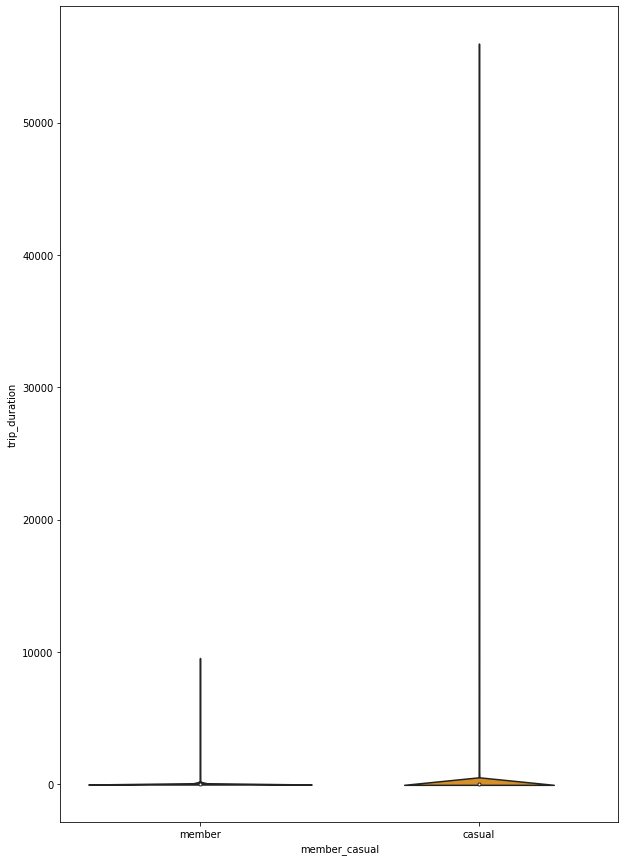

In [12]:
# We create a violin plot to see the distribution of rides depending on the lenght of the trip

order_membership = ['member', 'casual']
colors_duo = ['#0F2C67', '#F3950D']                                      
custom_palette_duo = sns.set_palette(sns.color_palette(colors_duo))

plt.figure(figsize=(10, 15))
sns.violinplot(x="member_casual", y="trip_duration", data=df, order=order_membership, palette=custom_palette_duo)

### Right away the violin plot shows that we have some instances of unbelieveable ride lenghts, such as longer than **50000 minutes** (over **833** hours).

On the website of the company that provided the original dataset it is statet that all the longest possible period of bike-usage is 3 hours. After that, **each additional minute** will cost you **0.15 dollars**. Therefore it is unlikely that anybody would use the bike longer than that.

I do not want to exclude all the rides exceeding the 3 hour mark, however. Because I have no way of validating the rides.  
Still, itt seems logical to me dismiss the rides that span longer than 10 hours.   
Let's see how many rides exceed the trip duration of **10 hours**.

In [13]:
check_duration = df.loc[df['trip_duration'] > 600]
check_duration

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,member_casual,start_station_name,start_lat,start_lng,end_station_name,end_lat,end_lng,trip_duration,start_month,start_day,start_hour
1517,33F3AF87982064B7,docked_bike,2020-10-29 18:09:38,2020-10-30 19:09:34,373,752,member,Broadway & Wilson Ave,41.965200,-87.658100,Clarendon Ave & Junior Ter,41.961000,-87.649600,1499.0,October,Thursday,18
1801,A3E37EA4F415DA84,docked_bike,2021-05-01 18:42:01,2021-05-02 07:44:02,318,752,casual,Burling St & Diversey Pkwy,41.933140,-87.647760,Clarendon Ave & Junior Ter,41.961000,-87.649600,782.0,May,Saturday,18
2668,8FBD78D7E8942427,docked_bike,2021-08-28 10:55:51,2021-08-29 10:00:10,430,752,casual,Clark St & Bryn Mawr Ave,41.983600,-87.669200,Clarendon Ave & Junior Ter,41.961000,-87.649600,1384.0,August,Saturday,10
3916,4A55C774381BDAED,docked_bike,2021-07-04 04:30:16,2021-07-04 18:52:48,17,752,casual,MLK Jr Dr & 29th St,41.842100,-87.617000,Clarendon Ave & Junior Ter,41.961000,-87.649600,862.0,July,Sunday,4
3918,85835F45845B5358,docked_bike,2020-10-15 17:45:25,2020-10-16 18:45:18,283,752,member,Sheridan Rd & Buena Ave,41.958463,-87.655044,Clarendon Ave & Junior Ter,41.961000,-87.649600,1499.0,October,Thursday,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348816,7C4787FDFD65A92E,classic_bike,2020-12-30 17:34:30,2020-12-31 10:34:41,306,306,casual,Elizabeth St & 92nd St,41.726799,-87.654290,Elizabeth St & 92nd St,41.726799,-87.654290,1020.0,December,Wednesday,17
4348838,B565F3DB8A064108,docked_bike,2021-03-27 18:45:45,2021-04-04 16:47:58,306,306,casual,Elizabeth St & 92nd St,41.726799,-87.654290,Elizabeth St & 92nd St,41.726799,-87.654290,11402.0,March,Saturday,18
4348839,CC6D7C07DF55006B,docked_bike,2021-03-27 18:46:55,2021-04-04 16:47:51,306,306,casual,Elizabeth St & 92nd St,41.726799,-87.654290,Elizabeth St & 92nd St,41.726799,-87.654290,11400.0,March,Saturday,18
4348952,AD2A84D2084ECD01,docked_bike,2021-07-05 14:35:08,2021-07-21 15:36:22,921,638,casual,Prospect Sq & 91st St,41.728234,-87.667524,Kedzie Ave & 110th St,41.692402,-87.700958,23101.0,July,Monday,14


### We see that there are 4497 hundred of such rows, which is about 0,1% of the whole dataset.  
For our analysis lets drop these quite outlandish rides and look at the violin plot one more time.

In [14]:
df = df.loc[df['trip_duration'] < 600]
df

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,member_casual,start_station_name,start_lat,start_lng,end_station_name,end_lat,end_lng,trip_duration,start_month,start_day,start_hour
0,D7AF692CFFAF7D2C,docked_bike,2020-10-01 00:00:06,2020-10-01 00:19:08,236,752,casual,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496,19.0,October,Thursday,0
1,69EE5097520BCBA3,docked_bike,2020-10-11 11:47:04,2020-10-11 12:01:30,236,752,member,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496,14.0,October,Sunday,11
2,9C402A0BEAD52E63,docked_bike,2020-10-11 11:47:07,2020-10-11 12:01:27,236,752,member,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496,14.0,October,Sunday,11
3,AFB9E917B7516F6A,classic_bike,2021-01-19 16:19:59,2021-01-19 16:38:23,236,752,member,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496,18.0,January,Tuesday,16
4,B61C622B3A930228,classic_bike,2021-03-29 14:08:43,2021-03-29 14:25:39,236,752,member,Lincoln Ave & Diversey Pkwy,41.932225,-87.658617,Clarendon Ave & Junior Ter,41.961,-87.6496,16.0,March,Monday,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4349538,096839D15AC678C5,electric_bike,2021-09-27 15:53:57,2021-09-27 15:55:43,210,210,casual,St Louis Ave & Norman Bobbins Ave,41.790000,-87.710000,St Louis Ave & Norman Bobbins Ave,41.790,-87.7100,1.0,September,Monday,15
4349539,19F924DB5B404045,electric_bike,2021-09-27 14:49:31,2021-09-27 17:16:12,474,474,casual,Richmond St & 59th St,41.790000,-87.700000,Richmond St & 59th St,41.790,-87.7000,146.0,September,Monday,14
4349540,978D680AC31D78A5,electric_bike,2021-09-28 14:15:01,2021-09-28 17:24:42,474,474,casual,Richmond St & 59th St,41.790000,-87.700000,Richmond St & 59th St,41.790,-87.7000,189.0,September,Tuesday,14
4349541,2CA3D63472C447C9,electric_bike,2021-09-29 15:39:49,2021-09-29 15:46:14,474,474,casual,Richmond St & 59th St,41.790000,-87.700000,Richmond St & 59th St,41.790,-87.7000,6.0,September,Wednesday,15


<AxesSubplot:xlabel='member_casual', ylabel='trip_duration'>

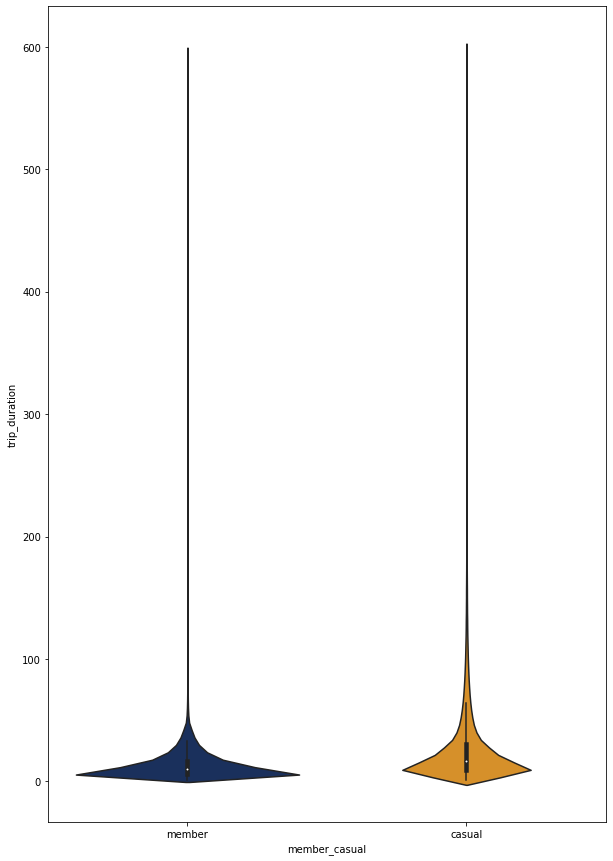

In [15]:
plt.figure(figsize=(10, 15))
sns.violinplot(x="member_casual", y="trip_duration", data=df, order=order_membership, palette=custom_palette_duo)

### Now, this plot is much more readable.
Here we can see that casual riders' lenght of trips is much more spread out compared to the membership users.  
To more clearly see the typical ride lenghts for each user type, lets take a look at median ride-lenghts per weekday

In [16]:
# Lists for reordering data in the plots. They will be used throughout the notebook
months = ['October', 'November', 'December', 
          'January', 'February', 'March', 
          'April', 'May', 'June', 'July', 
          'August', 'September']

days = ['Monday', 'Tuesday', 'Wednesday',
        'Thursday', 'Friday', 'Saturday',
        'Sunday']

In [17]:
# Creating a pivot table that calculates median ride durations by user type
daily_ride_times = df.pivot_table(values = 'trip_duration',
                                  index='start_day',
                                  columns='member_casual',
                                  aggfunc='median')

daily_ride_times = daily_ride_times.reindex(days)
daily_ride_times

member_casual,casual,member
start_day,,
Monday,17.0,9.0
Tuesday,15.0,9.0
Wednesday,15.0,9.0
Thursday,14.0,9.0
Friday,16.0,10.0
Saturday,19.0,11.0
Sunday,20.0,11.0


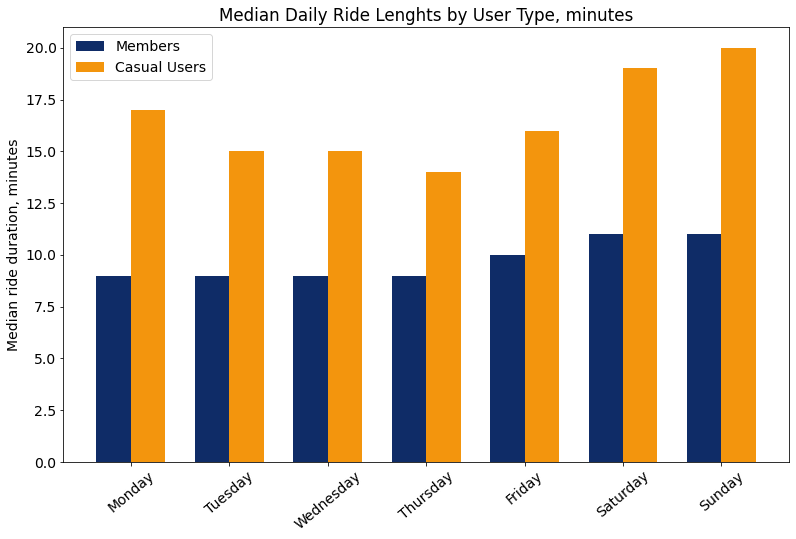

In [18]:
# Plotting the data

plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize =(13, 8))
labels = days
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# plot data in grouped manner of bar type

rect1 = plt.bar(x - width/2,  daily_ride_times['member'], width, color='#0F2C67', label='Members')
rect2 = plt.bar(x + width/2,  daily_ride_times['casual'], width, color='#F3950D', label='Casual Users')

plt.xticks(x, labels,  rotation=40)
plt.ylabel("Median ride duration, minutes")
plt.title('Median Daily Ride Lenghts by User Type, minutes')
plt.legend(['Members', 'Casual Users'], loc= 'upper left')


plt.show()

### The median trip duration for different types of users clearly shows tha **casual users** tend to take **much longer** rides compared to annual members.

#### One of possible explanations for that kind of difference is this:
Casual users might use the service mostly for leasure and as tourists exploring the city as the median ride duration for them is 17 minutes. 

And service subscribers most likely use bikes with a purpose to get from one place to the next. They might commute to/from work or school or use the bike as an inbetween mode of transportation. For them overall median trip duration is 10 minutes.

<a id="section-three"></a>
# Step 2: Analyising usage of the service 

### To begin with, I want to take a look at how much the amount of rides changes depenging on the month.

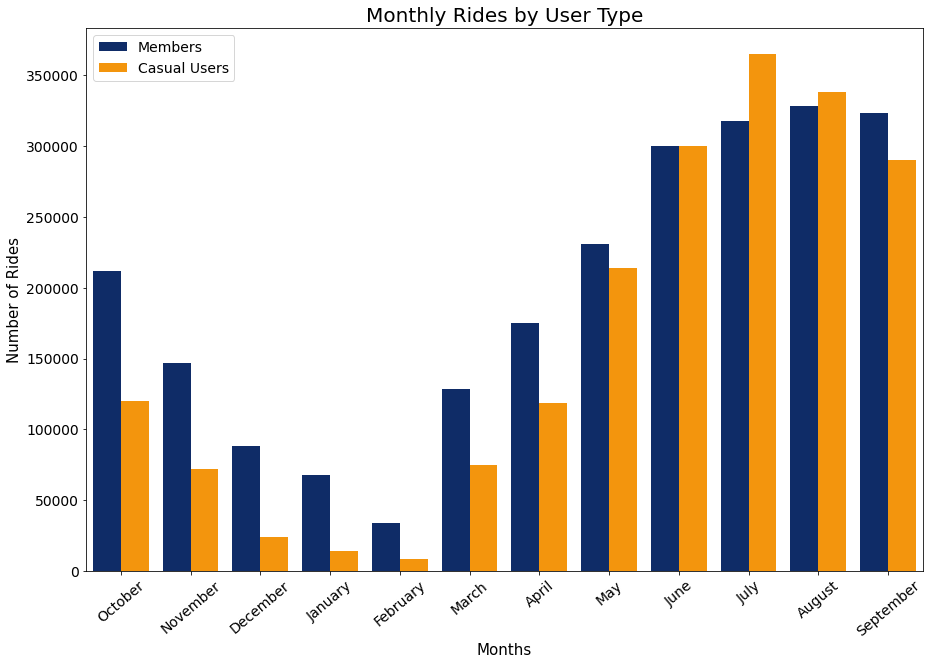

In [19]:
# Plotting monthly amounts of rides for both types of users.
colors_duo = ['#0F2C67', '#F3950D']                                      
custom_palette_duo = sns.set_palette(sns.color_palette(colors_duo))

plt.figure(figsize=(15, 10))
hue_order = ['member', 'casual']
sns.countplot(x="start_month", hue="member_casual", data=df, order=months, hue_order=hue_order, palette=custom_palette_duo, saturation=1)

plt.xticks(rotation=40)
plt.xlabel("Months", fontdict={'fontsize':15})
plt.ylabel("Number of Rides", fontdict={'fontsize':15})
plt.title('Monthly Rides by User Type', fontdict={'fontsize':20})
plt.legend(['Members', 'Casual Users'], loc= 'upper left')

## We can notice a drastic difference in usage during winter months compared to summer months.  
We can also notice, that in general threre are more rides made by members compared to casual users.  
It can easilly be explained with the nature of the seasons. Especially considering relatively cold and snowy winters in Chicago.
People are much less likely to take leasurely bike rides in the cold fall and winter months compared to the annual members who are most likely using the bikes to commute to and from work or school.  
What is notable is that a considerable portion of the annual members continue to use the the service no matter the weather.


## Now I will look at the rides of a weekday basis.

In [20]:
# Creating a pivot table for rides by weekdays

weekday_rides = df.pivot_table(values = 'ride_id',
                             index='start_day',
                             columns='member_casual',
                             aggfunc='count')

weekday_rides = weekday_rides.reindex(days)
weekday_rides

member_casual,casual,member
start_day,,
Monday,216351,319089
Tuesday,200967,346398
Wednesday,206061,360970
Thursday,219860,356860
Friday,275189,340608
Saturday,443952,336251
Sunday,377007,290508


In [21]:
# Calculating number of occurances of each week day to calculate the average number of rides for each day of the week
number_of_weekdays = pd.to_datetime(df['started_at'].dt.date.drop_duplicates())

number_of_weekdays = number_of_weekdays.dt.day_name().value_counts().reindex(days)
number_of_weekdays

Monday       52
Tuesday      52
Wednesday    52
Thursday     53
Friday       52
Saturday     52
Sunday       52
Name: started_at, dtype: int64

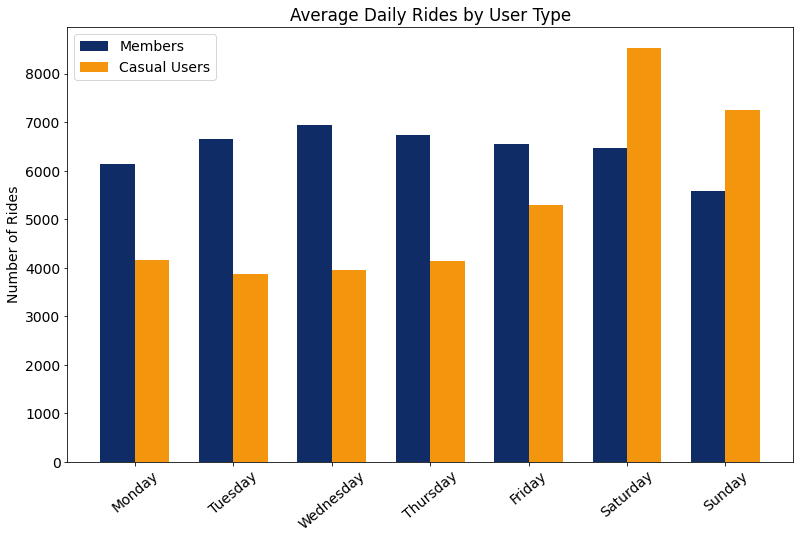

In [22]:
# Pllotting the data for weekly rides

plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize =(13, 8))
labels = days
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

  
# plot data in grouped manner of bar type
plt.bar(x - width/2,  weekday_rides['member']/number_of_weekdays, width, color='#0F2C67')
plt.bar(x + width/2,  weekday_rides['casual']/number_of_weekdays, width, color='#F3950D')

plt.xticks(x, labels,  rotation=40)
#plt.xlabel("Teams")
plt.ylabel("Number of Rides")
plt.title('Average Daily Rides by User Type')
plt.legend(['Members', 'Casual Users'], loc= 'upper left')



plt.show()

## Looking at this plot we can see a clear pattern. 
1) Those who purchase the annual membership tend to use the service evenly throughout the week. They generally use the bikes less on the weekends.
2) Casual users are nearly twice as likely to use the service on the weekend compared to business days.

These findings support the hypothesis that annual members use the service for work and casual riders - for leasure.

## Now let's take a look at the bike-usage on a 24-hour scale.

## Bike-sharing on a 24-hour scale

In [23]:
# Pivot table that displays rides by hour of the day

rides_by_hour= df.pivot_table(values = 'ride_id',
                              index='start_hour',
                              columns='member_casual',
                              aggfunc='count')

rides_by_hour

member_casual,casual,member
start_hour,,
0,38694,21466
1,27597,13701
2,17276,7495
3,9120,4192
4,6061,5402
5,7836,22693
6,17923,66450
7,32608,118563
8,45225,131312


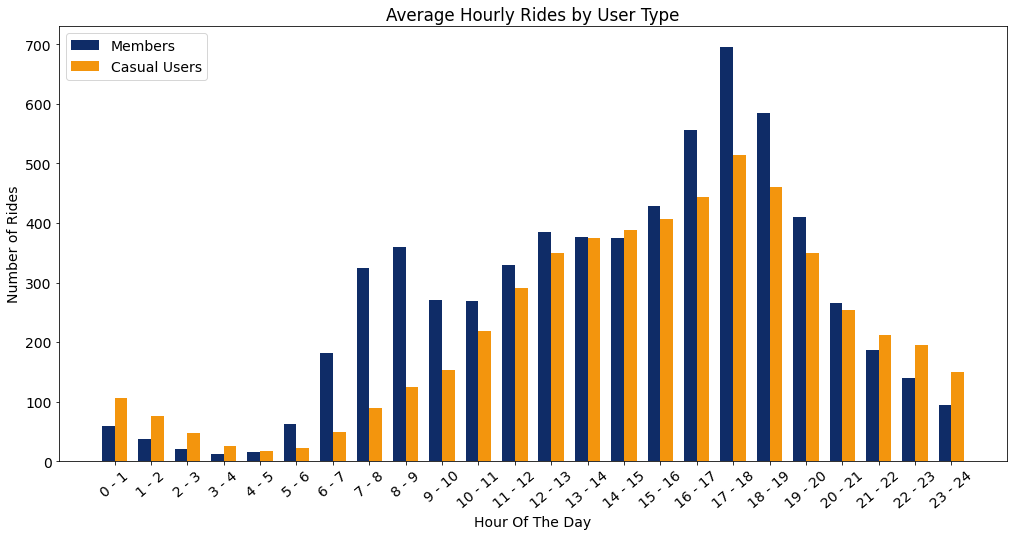

In [24]:
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize =(17, 8))

# In this instance we will create label for each hourly interval
labels = []
for i in range(0, 24):
    label = f'{i} - {i+1}'
    labels.append(label)
    
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

  
# plot data in grouped manner of bar type. It is important to divide the data by the number of days to get the average
members = plt.bar(x - width/2,  rides_by_hour['member']/365, width, color='#0F2C67', label='Members')
casual = plt.bar(x + width/2,  rides_by_hour['casual']/365, width, color='#F3950D', label='Casual Users')

plt.xticks(x, labels,  rotation=40)
plt.ylabel('Number of Rides')
plt.xlabel('Hour Of The Day')
plt.title('Average Hourly Rides by User Type')
plt.legend(['Members', 'Casual Users'], loc= 'upper left')




plt.show()

## The comparison by hour shows a clear pattern for casual users
For members: we can see **3 spikes** in the activity.  
If we look closely we notice that those spikes occur around 8 am, 1 pm and 5 pm. Precisely the times when people usually go to work/school, go for lunch and return home in the evening.

For casual users, the intensity of usage gradually rises to it's maximum at about 5 pm. At this time most people stop their working hours and can take a relaxing bike ride.

<a id="section-four"></a>
# Step 3: Taking a closer look at the data from February and July

## As we saw during the previous step, February and July are the two extremes among months when it comes to the usage of Cyclistic. Let's compare the two.

## First, comparing February and July on the basis of the weekly rides

In [25]:
# Using this pivot table we can later plot values for every month

md_group= df.pivot_table(values = 'ride_id', index=['start_month', 'start_day'], columns='member_casual', aggfunc='count')

md_group

member_casual          casual  member
start_month start_day                
April       Friday      19545   31162
            Monday      13895   24310
            Saturday    24748   23195
            Sunday      22594   22082
            Thursday    10318   24284
...                       ...     ...
September   Saturday    61522   40737
            Sunday      56758   37997
            Thursday    39130   59227
            Tuesday     24061   43050
            Wednesday   34833   58691

[84 rows x 2 columns]

In [26]:
# Calculating iccurances of each weekday in February to calculate the average
weekdays_feb = pd.to_datetime(df.loc[df['start_month'] == 'February']['started_at'].dt.date.drop_duplicates())
weekdays_feb = weekdays_feb.dt.day_name().value_counts().reindex(days)
weekdays_feb

Monday       4
Tuesday      4
Wednesday    4
Thursday     4
Friday       4
Saturday     4
Sunday       4
Name: started_at, dtype: int64

In [27]:
# Calculating iccurances of each weekday in July to calculate the average
weekdays_jul = pd.to_datetime(df.loc[df['start_month'] == 'July']['started_at'].dt.date.drop_duplicates())
weekdays_jul = weekdays_jul.dt.day_name().value_counts().reindex(days)
weekdays_jul

Monday       4
Tuesday      4
Wednesday    4
Thursday     5
Friday       5
Saturday     5
Sunday       4
Name: started_at, dtype: int64

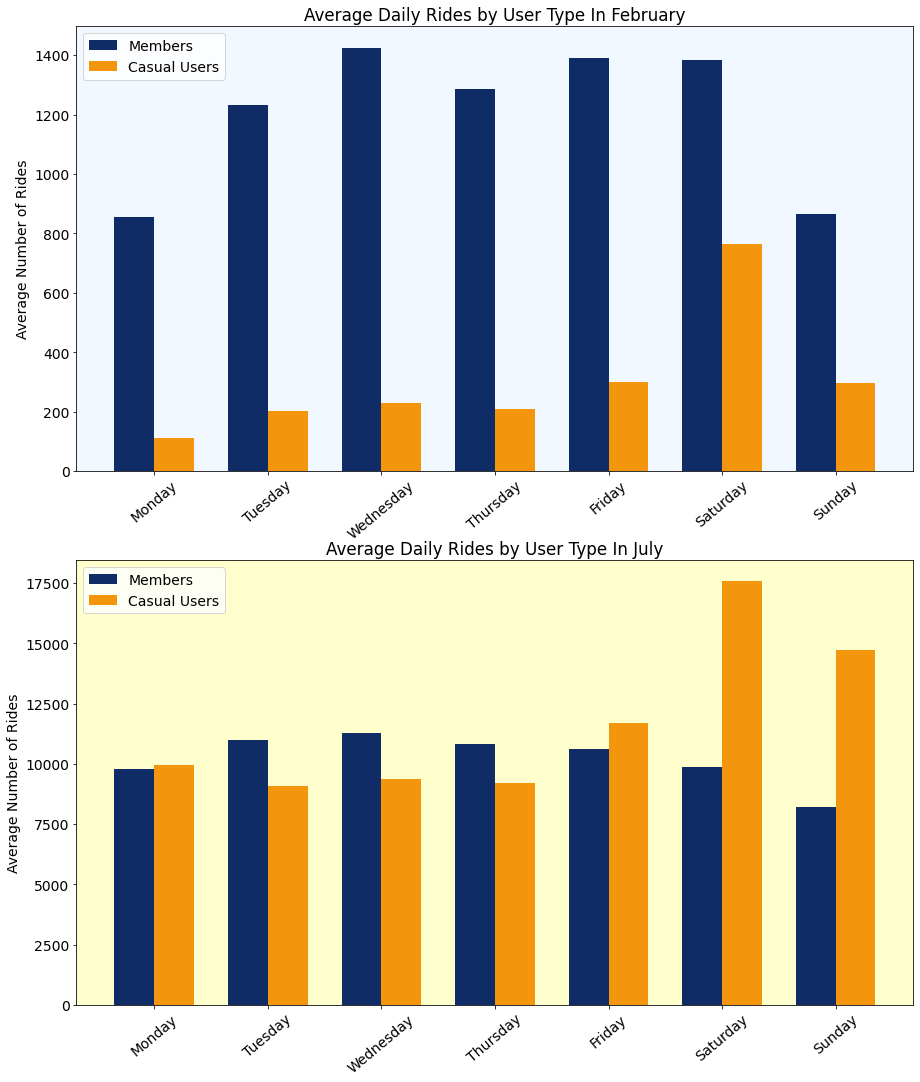

In [28]:
# Now let's plot the aggregated data

fig, (ax1, ax2) = plt.subplots(2, 1, figsize =(15, 18))

plt.rcParams.update({'font.size': 14})


# labels for x-axis
labels = days
    
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

  
# plot data in grouped manner of bar type for February
ax1.bar(x - width/2, md_group.loc['February']['member'].reindex(days)/weekdays_feb, width, color='#0F2C67', label='Members')
ax1.bar(x + width/2,  md_group.loc['February']['casual'].reindex(days)/weekdays_feb, width, color='#F3950D', label='Casual Users')

plt.sca((ax1)) # additional parameters for each subplot
plt.xticks(x, labels,  rotation=40)
plt.ylabel('Average Number of Rides')
plt.title('Average Daily Rides by User Type In February')
plt.legend(['Members', 'Casual Users'], loc= 'upper left')
ax1.set_facecolor('#f2f8ff')


# plot data in grouped manner of bar type for July
ax2.bar(x - width/2, md_group.loc['July']['member'].reindex(days)/weekdays_jul, width, color='#0F2C67', label='Members')
ax2.bar(x + width/2,  md_group.loc['July']['casual'].reindex(days)/weekdays_jul, width, color='#F3950D', label='Casual Users')

plt.sca((ax2)) # additional parameters for each subplot
plt.xticks(x, labels,  rotation=40)
plt.ylabel('Average Number of Rides')
plt.title('Average Daily Rides by User Type In July')
plt.legend(['Members', 'Casual Users'], loc= 'upper left')
ax2.set_facecolor("#feffcc")





plt.show()

## From the two graphs it is obvious that during winter months people without the annual subscription practically never use the service. With the exception of Saturdays.
This is quite understandable, bacause winters in Chicago are not the most plesant.  
What is notable, is that members, although considerably less, still use the bikes consistently through the business week.

In comparison, in July the amount of casuals' and members' rides are almost the same during the business week. And weekends in July are the time when casual users greately 'outride' the members.

## And now looking at the rides in February and July within the 24 hour period

In [29]:
# Using this pivot table we can later plot values for every month
mh_group= df.pivot_table(values = 'ride_id', index=['start_month', 'start_hour'], columns='member_casual', aggfunc='count')

In [30]:
mh_group

member_casual           casual  member
start_month start_hour                
April       0             2147    1449
            1             1363     836
            2              534     334
            3              268     210
            4              260     377
...                        ...     ...
September   19           18686   20444
            20           12627   13129
            21           11218   10428
            22           11398    8245
            23            8422    5416

[288 rows x 2 columns]

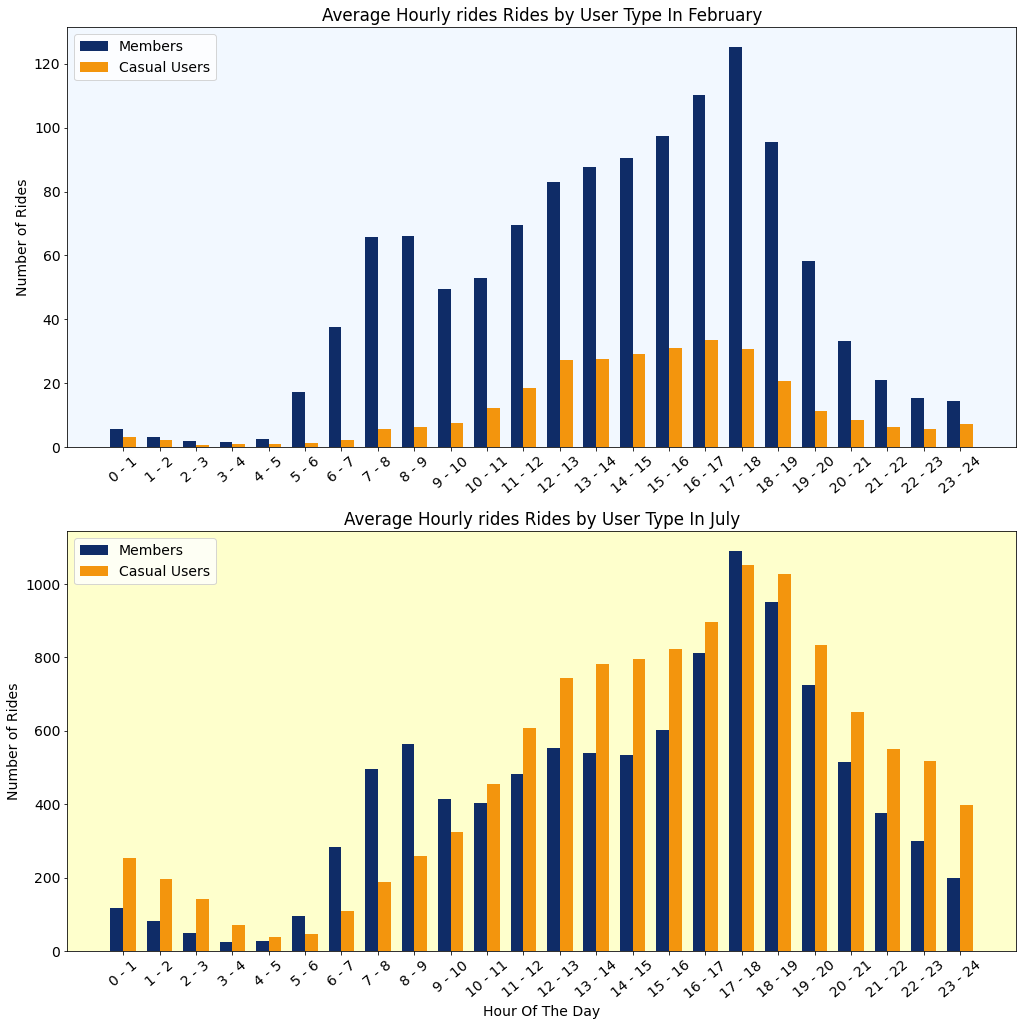

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize =(17, 17))

plt.rcParams.update({'font.size': 14})


# In this instance we will create label for each hourly interval
labels = []
for i in range(0, 24):
    label = f'{i} - {i+1}'
    labels.append(label)
    
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

  
# plot data in grouped manner of bar type for February
ax1.bar(x - width/2, mh_group.loc['February']['member']/28, width, color='#0F2C67', label='Members')
ax1.bar(x + width/2,  mh_group.loc['February']['casual']/28, width, color='#F3950D', label='Casual Users')

plt.sca((ax1))
plt.xticks(x, labels,  rotation=40)
plt.ylabel('Number of Rides')
#plt.xlabel('Hour Of The Day')
plt.title('Average Hourly rides Rides by User Type In February')
plt.legend(['Members', 'Casual Users'], loc= 'upper left')
ax1.set_facecolor('#f2f8ff')

# plot data in grouped manner of bar type for July
ax2.bar(x - width/2, mh_group.loc['July']['member']/31, width, color='#0F2C67', label='Members')
ax2.bar(x + width/2,  mh_group.loc['July']['casual']/31, width, color='#F3950D', label='Casual Users')

plt.sca((ax2))
plt.xticks(x, labels,  rotation=40)
plt.ylabel('Number of Rides')
plt.xlabel('Hour Of The Day')
plt.title('Average Hourly rides Rides by User Type In July')
plt.legend(['Members', 'Casual Users'], loc= 'upper left')
ax2.set_facecolor("#feffcc")





plt.show()

## Within average 24 hours in February and July the rides of members repeat the pattern noticed in the 24 hours averaged through the year. We can still see those 3 peaks in rides around 8 am, 1 pm and 5 pm.

## For the casual riders the most aparent pattern is the seasonal nature of their use of the service. During cold winter months they almost don't use the service at all. We could assume that this is why they are not interested in investing the money into the purchase of the annual membership.

<a id="section-five"></a>
# Step 4: Comparing bike preferences among members and casual riders.

<Figure size 1080x720 with 0 Axes>

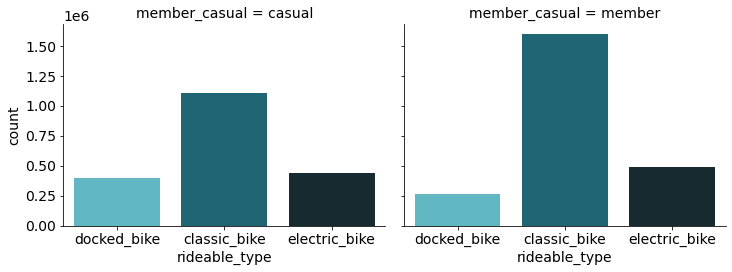

In [32]:
# Creating a plot that compares bike usage
colors_trio = ['#51C4D3', '#126E82', '#132C33']
custom_palette_trio = sns.set_palette(sns.color_palette(colors_trio))

plt.figure(figsize=(15, 10))
sns.catplot(x="rideable_type", col="member_casual",
            data=df, kind="count",
            height=4, aspect=1.3, palette=custom_palette_trio);

### We see that the overall bike prefferences are consistent among both casual users and users with an annual subscription. It is hard to conclude to what extent those preferences depend on the availability. 
### But we can see that classic bikes make up the overwhelming majority out of all the bikes used.


<a id="section-six"></a>
# Step 5: Analysing and presenting visually the most popular bike stations.

## Looking at the most popular bike-sharing stations depending on user type

In [33]:
# Creating 2 tables for start and end stations used by members arranged by popylarity


grouping_start = ['start_station_name',
                  'start_station_id',
                  'start_lat',
                  'start_lng']   # A list of cols to reduce line lenght

grouping_end = ['end_station_name',
                'end_station_id',
                'end_lat',
                'end_lng']   # A list of cols to reduce line lenght

start_stations_m = df.loc[df['member_casual'] == 'member'].groupby(grouping_start).size().reset_index() \
.rename(columns={0:'count'})

start_stations_m = start_stations_m.sort_values('count', ascending=False).reset_index(drop=True)

end_stations_m = df.loc[df['member_casual'] == 'member'].groupby(grouping_end).size().reset_index() \
.rename(columns={0:'count'})

end_stations_m = end_stations_m.sort_values('count', ascending=False).reset_index(drop=True)

In [34]:
# For visualising the most important data on the map let's select top 150 stations used by members


members_top_start_st = start_stations_m.head(150)


members_top_end_st = end_stations_m.head(150)
members_top_end_st.head()

,end_station_name,end_station_id,end_lat,end_lng,count
0,Clark St & Elm St,336,41.902973,-87.631280,23143
1,Wells St & Concord Ln,512,41.912133,-87.634656,21628
2,Kingsbury St & Kinzie St,190,41.889176,-87.638505,20460
3,Wells St & Elm St,449,41.903200,-87.634300,19318
4,Lake Shore Dr & North Blvd,951,41.911722,-87.626804,19202


In [35]:
# Creating 2 tables for start and end stations used by casual users arranged by popylarity

start_stations_c = df.loc[df['member_casual'] == 'casual'].groupby(grouping_start).size().reset_index() \
.rename(columns={0:'count'})

start_stations_c = start_stations_c.sort_values('count', ascending=False).reset_index(drop=True)

end_stations_c = df.loc[df['member_casual'] == 'casual'].groupby(grouping_end).size().reset_index() \
.rename(columns={0:'count'})

end_stations_c = end_stations_c.sort_values('count', ascending=False).reset_index(drop=True)

In [36]:
# For visualising the most important data on the map let's select top 150 stations used by casual users


casual_top_start_st = start_stations_c.head(150)


casual_top_end_st = end_stations_c.head(150)
casual_top_end_st.head()

,end_station_name,end_station_id,end_lat,end_lng,count
0,Streeter Dr & Grand Ave,698,41.892300,-87.612000,61955
1,Lake Shore Dr & North Blvd,951,41.911722,-87.626804,33333
2,Millennium Park,979,41.881031,-87.624084,32000
3,Lake Shore Dr & Monroe St,40,41.880958,-87.616743,31710
4,Michigan Ave & Oak St,100,41.901000,-87.623800,29426


## Most popular starting stations by the type of user. (Blue = Members, Orange = Casual users)

In [37]:
# Make an empty dual map
map_start_stations = DualMap(location=[41.88,-87.62], tiles='cartodbpositron', zoom_start=13)

for i in range(0,len(members_top_start_st)):
   folium.Circle(
      location=[members_top_start_st.iloc[i]['start_lat'],
                members_top_start_st.iloc[i]['start_lng']],
      popup=members_top_start_st.iloc[i]['start_station_name'],
      radius=float(members_top_start_st.iloc[i]['count']/100),
      color='#0F2C67',
      fill=True,
      fill_color='#0F2C67').add_to(map_start_stations.m1)

for i in range(0,len(casual_top_start_st)):
   folium.Circle(
      location=[casual_top_start_st.iloc[i]['start_lat'],
                casual_top_start_st.iloc[i]['start_lng']],
      popup=casual_top_start_st.iloc[i]['start_station_name'],
      radius=float(casual_top_start_st.iloc[i]['count']/100),
      color='#F3950D',
      fill=True,
      fill_color='#F3950D').add_to(map_start_stations.m2)

map_start_stations


## Most popular end stations by the type of user. (Blue = Members, Orange = Casual users)

In [38]:
# Make an empty map for end stations
map_end_stations = DualMap(location=[41.88,-87.62], tiles="cartodbpositron", zoom_start=13)

for i in range(0,len(members_top_end_st)):
   folium.Circle(
      location=[members_top_end_st.iloc[i]['end_lat'],
                members_top_end_st.iloc[i]['end_lng']],
      popup=members_top_end_st.iloc[i]['end_station_name'],
      radius=float(members_top_end_st.iloc[i]['count']/100),
      color='#0F2C67',
      fill=True,
      fill_color='#0F2C67').add_to(map_end_stations.m1)

for i in range(0,len(casual_top_end_st)):
   folium.Circle(
      location=[casual_top_end_st.iloc[i]['end_lat'],
                casual_top_end_st.iloc[i]['end_lng']],
      popup=casual_top_end_st.iloc[i]['end_station_name'],
      radius=float(casual_top_end_st.iloc[i]['count']/100),
      color='#F3950D',
      fill=True,
      fill_color='#F3950D').add_to(map_end_stations.m2)

map_end_stations

## We created two dual maps for start and end stations used by customes. 
## The fact that start and end stations usage is fairly similar can be atributed to the fact that:
1) people often travel back and forth between two points   
2) people take the bike, ride around for leasurely purposes and return it to the same station.

Here if we look side by side at the stations most commonly used by the two user types we can clearly see two things:
1) Casual users tend to use stations closer to the coastline, beaches and generally "touristic" destinations. Some of the most heavily used stations are:
- Streeter Dr & Grand Ave 
- Lake Shore Dr & North Blvd 
- Millenium Park.

2) Stations used by annual members are much more evenly destributed in therms of amount of rides and located deeper into the city with clusters of popular stations situated around universities and densely populated living areas. Some of the most heavily used stations include:
- Clark St & Elm St
- Wells St & Concord 
- Kingsbury St & Kinzie St

### But these maps are somewhat smoothed throughout the year. What if we take a look at the months with the least and the most amounts of rides. Will they differ?

## Creating tables to look at popular stations in February and July - two drastically different months by usage



In [39]:
# Usage of stations by members and casual users in February

feb_start_stations_m = df.loc[(df['member_casual'] == 'member') & (df['start_month'] == 'February')] \
                              .groupby(grouping_start).size().reset_index().rename(columns={0:'count'})

feb_start_stations_m = feb_start_stations_m.sort_values('count', ascending=False).reset_index(drop=True)


# Usage of stations by casual users in February

feb_start_stations_c = df.loc[(df['member_casual'] == 'casual') & (df['start_month'] == 'February')] \
                          .groupby(grouping_start).size().reset_index().rename(columns={0:'count'})

feb_start_stations_c = feb_start_stations_c.sort_values('count', ascending=False).reset_index(drop=True)

In [40]:
# # Usage of stations by members and casual users in July


jul_start_stations_m = df.loc[(df['member_casual'] == 'member') & (df['start_month'] == 'July')] \
                          .groupby(grouping_start).size().reset_index().rename(columns={0:'count'})

jul_start_stations_m = jul_start_stations_m.sort_values('count', ascending=False).reset_index(drop=True)


# # Usage of stations by casual users in July

jul_start_stations_c = df.loc[(df['member_casual'] == 'casual') & (df['start_month'] == 'July')] \
                          .groupby(grouping_start).size().reset_index().rename(columns={0:'count'})

jul_start_stations_c = jul_start_stations_c.sort_values('count', ascending=False).reset_index(drop=True)


## Selecting top february and july stations for members and casual users

In [41]:
#Start off with members
# We will use these when creating the maps

feb_start_m_top = feb_start_stations_m.head(150)
jul_start_m_top = jul_start_stations_m.head(150)

# Same for casual users
# We will use these when creating the maps

feb_start_c_top = feb_start_stations_c.head(150)
jul_start_c_top = jul_start_stations_c.head(150)


## Creating maps for popular stations in February (Blue = Members, Orange = Casual Users)

In [42]:
# Make an empty map
feb_start_stations = DualMap(location=[41.88,-87.62], tiles="cartodbpositron", zoom_start=13)

for i in range(0,len(feb_start_m_top)):
   folium.Circle(
      location=[feb_start_m_top.iloc[i]['start_lat'],
                feb_start_m_top.iloc[i]['start_lng']],
      popup=(feb_start_m_top.iloc[i]['start_station_name'],
             feb_start_m_top.iloc[i]['count']),
      radius=float(feb_start_m_top.iloc[i]['count']/5),
      color='#0F2C67',
      fill=True,
      fill_color='#0F2C67').add_to(feb_start_stations.m1)

for i in range(0,len(feb_start_c_top)):
   folium.Circle(
      location=[feb_start_c_top.iloc[i]['start_lat'],
                feb_start_c_top.iloc[i]['start_lng']],
      popup=(feb_start_c_top.iloc[i]['start_station_name'],
             feb_start_c_top.iloc[i]['count']),
      radius=float(feb_start_c_top.iloc[i]['count']/5),
      color='#F3950D',
      fill=True,
      fill_color='#F3950D').add_to(feb_start_stations.m2)

feb_start_stations

## Creating maps for popular stations in July (Blue = Members, Orange = Casual Users)

In [43]:
# Make an empty map
jul_start_stations = DualMap(location=[41.88,-87.62], tiles="cartodbpositron", zoom_start=13)

for i in range(0,len(jul_start_m_top)):
   folium.Circle(
      location=[jul_start_m_top.iloc[i]['start_lat'],
                jul_start_m_top.iloc[i]['start_lng']],
      popup=jul_start_m_top.iloc[i]['start_station_name'],
      radius=float(jul_start_m_top.iloc[i]['count']/20),
      color='#0F2C67',
      fill=True,
      fill_color='#0F2C67').add_to(jul_start_stations.m1)

for i in range(0,len(jul_start_c_top)):
   folium.Circle(
      location=[jul_start_c_top.iloc[i]['start_lat'],
                jul_start_c_top.iloc[i]['start_lng']],
      popup=jul_start_c_top.iloc[i]['start_station_name'],
      radius=float(jul_start_c_top.iloc[i]['count']/20),
      color='#F3950D',
      fill=True,
      fill_color='#F3950D').add_to(jul_start_stations.m2)

jul_start_stations

As expected, we can see that in February people who used the service as a one-time ride used pretty much the same stations as the members of the service. We need to keep an eye on them. Theoretically we can maximize the growth in annual members if we advertise to the people who might want to use the service as a regular commute and not a once a week occurance.

And when we look at July the picture is completely different. Here the seasonal nature of casual riders is the most apparent.

The members seem to use the service pretty consistently through the months, though much more in the warmer seasons. And the amount of casual rides spikes around the most scenery-heavy stations and places that are advertised by the company. Those people will likely not use our service consistently and would not want to pay for a subscription.

### Taking a look at the popular stations gave us some great insights. But what about the routes the riders take? 
Even thtough we do not have the precise gps tracking of the routes taken, we can still gain some insights if we visualise the lines between the stations that are most frequiently used together on a map.  
Let's do that right now. 

<a id="section-seven"></a>
# Step 6: Analysing and presenting visually the most popular routes taken by users.

In [44]:
# Creating a table that displays members' and casual users' routes by popularity


routes_columns = ['start_station_name',
                  'start_station_id',
                  'start_lat',
                  'start_lng',                   # A list of cols to reduce line lenght
                  'end_station_name',
                  'end_station_id',
                  'end_lat', 'end_lng']

routes_members = df.loc[df['member_casual'] == 'member'].groupby(routes_columns).size().reset_index() \
.rename(columns={0:'count'})


routes_casual = df.loc[df['member_casual'] == 'casual'].groupby(routes_columns).size().reset_index() \
.rename(columns={0:'count'})

In [45]:
# Sorting routes tables in ascending order

routes_members = routes_members.sort_values('count', ascending=False).reset_index(drop=True)

routes_casual = routes_casual.sort_values('count', ascending=False).reset_index(drop=True)

routes_members.head()

,start_station_name,start_station_id,start_lat,start_lng,end_station_name,end_station_id,end_lat,end_lng,count
0,Ellis Ave & 60th St,69,41.785100,-87.601100,Ellis Ave & 55th St,649,41.794286,-87.601511,2769
1,Ellis Ave & 55th St,649,41.794286,-87.601511,Ellis Ave & 60th St,69,41.785100,-87.601100,2471
2,State St & 33rd St,875,41.834734,-87.625813,Calumet Ave & 33rd St,249,41.834900,-87.617930,1440
3,MLK Jr Dr & 29th St,17,41.842100,-87.617000,State St & 33rd St,875,41.834734,-87.625813,1400
4,Calumet Ave & 33rd St,249,41.834900,-87.617930,State St & 33rd St,875,41.834734,-87.625813,1340


In [46]:
# Selecting the most popular routes, that were used more than 500 times during 12 months

top_routes_cas = routes_casual[routes_casual['count'] > 500]

top_routes_mem = routes_members[routes_members['count'] > 500]

top_routes_cas.head()

,start_station_name,start_station_id,start_lat,start_lng,end_station_name,end_station_id,end_lat,end_lng,count
0,Streeter Dr & Grand Ave,698,41.892300,-87.612000,Streeter Dr & Grand Ave,698,41.892300,-87.612000,10568
1,Lake Shore Dr & Monroe St,40,41.880958,-87.616743,Lake Shore Dr & Monroe St,40,41.880958,-87.616743,7595
2,Millennium Park,979,41.881031,-87.624084,Millennium Park,979,41.881031,-87.624084,5821
3,Michigan Ave & Oak St,100,41.901000,-87.623800,Michigan Ave & Oak St,100,41.901000,-87.623800,5575
4,Lake Shore Dr & Monroe St,40,41.880958,-87.616743,Streeter Dr & Grand Ave,698,41.892300,-87.612000,4882


## Creating a Dual Map that displays most common routes taken by User Type


In [47]:
routes_map = DualMap(location=[41.88,-87.62], tiles="cartodbpositron", zoom_start=13)


for i in range(0,len(top_routes_mem)):
    folium.PolyLine(locations=[(top_routes_mem.iloc[i]['start_lat'],
                                top_routes_mem.iloc[i]['start_lng']),
                               (top_routes_mem.iloc[i]['end_lat'],
                                top_routes_mem.iloc[i]['end_lng'])],
                    popup=({top_routes_mem.iloc[i]['start_station_name']},
                           top_routes_mem.iloc[i]['end_station_name'],
                           top_routes_mem.iloc[i]['count']), 
                    smooth_factor=0.5,
                    color='#0F2C67',
                    weight=3,
                    opacity=0.8).add_to(routes_map.m1)
    
for i in range(0,len(top_routes_cas)):
    folium.PolyLine(locations=[(top_routes_cas.iloc[i]['start_lat'],
                                top_routes_cas.iloc[i]['start_lng']),
                               (top_routes_cas.iloc[i]['end_lat'],
                                top_routes_cas.iloc[i]['end_lng'])],
                    popup=(top_routes_cas.iloc[i]['start_station_name'],
                           top_routes_cas.iloc[i]['end_station_name'],
                           top_routes_cas.iloc[i]['count']), 
                    smooth_factor=0.5,
                    color='#F3950D',
                    weight=3,
                    opacity=0.8).add_to(routes_map.m2)
    
routes_map

## This map clearly demonstrates what we were talking about before. 
 Most casual users commute the most around Lake Shore Drive area

 Members of the service on the other hand do not have one clear center of attraction. Their routes are much more disperced throughout the city. If we look closer, some of the most popular routes are connected to the University buildings, so we can suggest that a considerable amount of members are students or teachers.

<a id="section-eight"></a>
# Conclusion and possible suggestions for the marketing strategy.

Through this analysis we gained some valuable insights:
- Annual members:  
  1) Use the  consistently throughout the year;  
  2) Use bikes more during business day, especially in the morning, at lunch time and at the end of the working day  
  3) Take short rides (median = 10 minutes)  
  4) Use stations evenly through the city with emphasis on stations around universities  
  5) Routes dispersed around the city with clusters around universities and living areas

- Casual riders:  
  1) Usage greately depends on the season (minimal use in winter period);  
  2) Bike usage maximised during evenings and weekends;  
  3) Main activity centered around Lake Shore Drive area and other local attractions;  
  4) Routes centered around Lake Shore Drive and tourist destinations;  
  5) Generally take longer rides (median = 17 minutes)
 
## Here are some possible ideas for boosting the conversion from casual users to members:  
  1) Creating a members plan for warmer months (i.e. March - October), to stimulate those casual users who don't use bikes in the winter  
  2) Creating monthly membership plans  
  3) Take a closer look at universities and advertise the membership plan to students (possibly with discounts)
  
## Additional area of research:
- Why the collected data sometimes contains rides that are several days/months long?
  
  